In [3]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.6/876.6 kB 14.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 MB 50.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 17.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 36.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 118.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 111.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 23.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 53.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 94.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
from ultralytics import YOLO
from ultralytics.data.converter import convert_coco
import json
import os
import re

In [ ]:

if __name__ == "__main__":
    # Model Training
    model = YOLO("yolo11s-seg.pt")
    model.train(
        data="./data.yaml",
        epochs=100,
        patience=10,
        batch=8,
        lr0=0.0001,
        imgsz=640,
        optimizer='AdamW'
    )

New https://pypi.org/project/ultralytics/8.3.21 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.20 🚀 Python-3.9.18 torch-2.5.0+cu124 CUDA:0 (Tesla V100-SXM2-16GB, 16144MiB)
engine/trainer: task=segment, mode=train, model=yolo11s-seg.pt, data=./data.yaml, epochs=100, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train14, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /mnt/aiongpfs/users/lweber/trash_detector/datasets/TACO/train/labels.cache... 1365 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1365/1365 [00:00<?, ?it/s]
val: Scanning /mnt/aiongpfs/users/lweber/trash_detector/datasets/TACO/val/labels.cache... 621 images, 0 backgrounds, 0 corrupt: 100%|██████████| 621/621 [00:00<?, ?it/s]


Plotting labels to runs/segment/train14/labels.jpg... 
optimizer: AdamW(lr=0.0001, momentum=0.937) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 7 dataloader workers
Logging results to runs/segment/train14
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.61G      1.174      2.473      4.031      1.127         34        640: 100%|██████████| 171/171 [00:20<00:00,  8.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.35it/s]


                   all        621       3173       0.43     0.0477     0.0259     0.0199      0.421     0.0428     0.0226     0.0137

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.21G      1.029      2.037      3.241      1.058         37        640: 100%|██████████| 171/171 [00:19<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:06<00:00,  6.42it/s]


                   all        621       3173      0.431      0.102     0.0703     0.0581      0.427        0.1     0.0686     0.0515

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.28G     0.9922      1.918      2.968       1.04         29        640: 100%|██████████| 171/171 [00:18<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.59it/s]


                   all        621       3173       0.51      0.125      0.102     0.0848      0.504      0.124      0.099     0.0708

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.26G      1.002      1.846      2.835      1.036         16        640: 100%|██████████| 171/171 [00:18<00:00,  9.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.75it/s]


                   all        621       3173      0.483      0.141      0.121      0.102      0.481       0.14      0.118     0.0895

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.25G     0.9832      1.808      2.673      1.025         19        640: 100%|██████████| 171/171 [00:18<00:00,  9.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.87it/s]


                   all        621       3173      0.486       0.19      0.165      0.141      0.509      0.167      0.152      0.117

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.23G     0.9276      1.731      2.527      1.011         28        640: 100%|██████████| 171/171 [00:18<00:00,  9.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.87it/s]


                   all        621       3173       0.45       0.22      0.198      0.167      0.485      0.211       0.19      0.132

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.23G     0.9447      1.734      2.471      1.006         38        640: 100%|██████████| 171/171 [00:18<00:00,  9.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.63it/s]


                   all        621       3173      0.412      0.247      0.226       0.19      0.409      0.245      0.221      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.25G     0.9028      1.646      2.388     0.9949         24        640: 100%|██████████| 171/171 [00:18<00:00,  9.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 39/39 [00:05<00:00,  6.83it/s]


                   all        621       3173      0.535      0.222      0.233      0.194      0.545      0.212      0.227      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.19G     0.9223      1.642      2.326      1.005         50        640:  80%|████████  | 137/171 [00:15<00:03,  9.72it/s]


image 1/1 /mnt/aiongpfs/users/lweber/trash_detector/test_data/image1.jpg: 480x640 2 Plastic bottle caps, 1 Tissues, 1 Wrapping paper, 2 Plastic films, 1 Other plastic wrapper, 1 Unlabeled litter, 14.2ms
Speed: 2.5ms preprocess, 14.2ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)


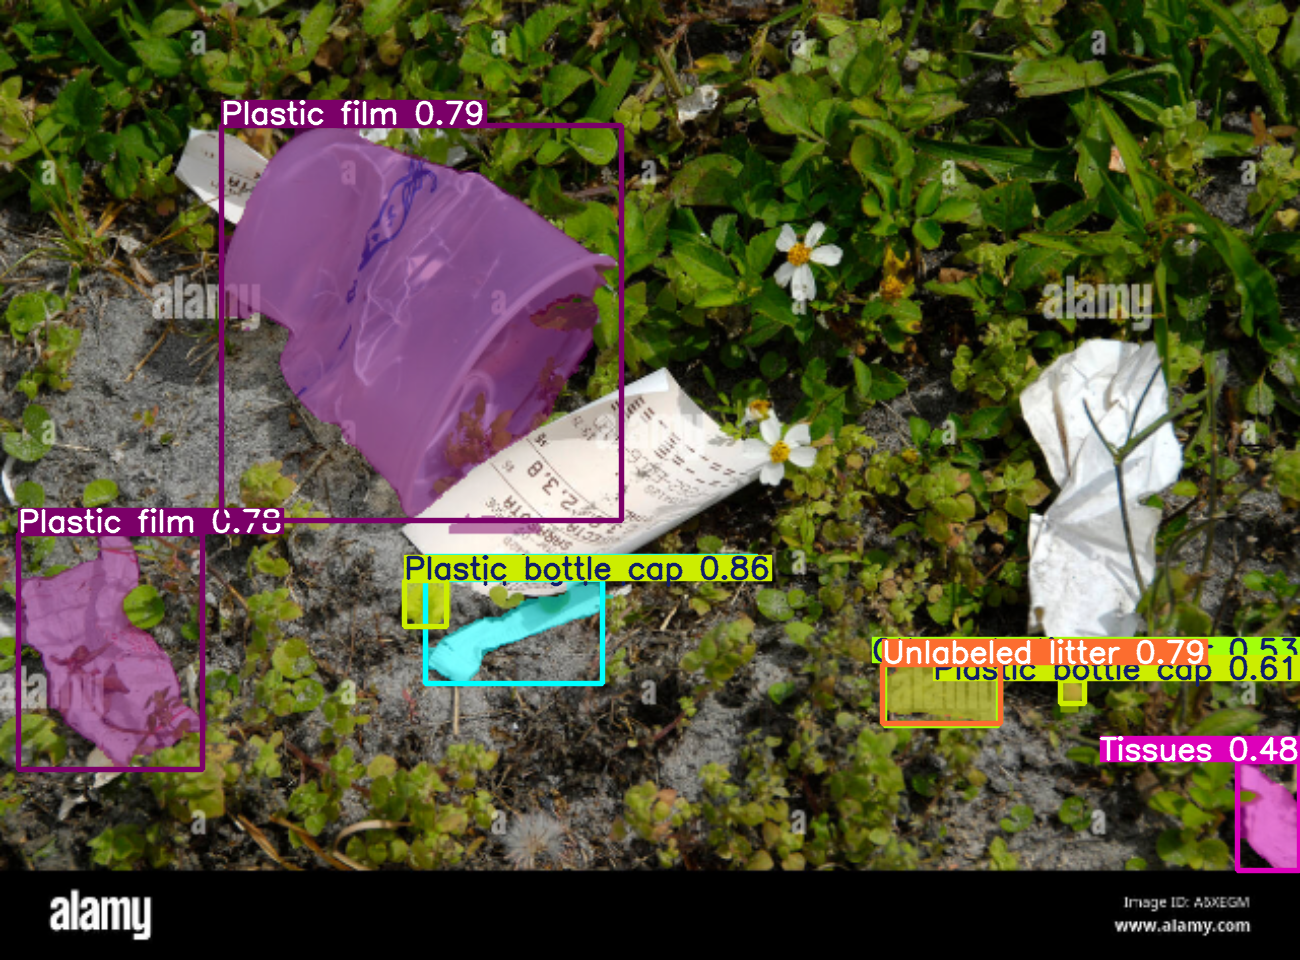

In [25]:
results = model.predict("./test_data/image1.jpg")
from PIL import Image
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")